# World Economic Indicators 
---
**Content**
- Country Name
- Country Code
- GDP (current US$)
- GDP Growth (Annual %)
- Unemployment, Total (% of Total Labour Force)
- Personal Remittances, Received (% of GDP)

*Data downloaded from [kaggle](www.kaggle.com) in a .csv format*

# 1.0 Import the libraries we are using

In [26]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from helpers.countries_data import european_countries
import plotly.express as px

# 1.1 Create an object with the data from the csv file

Create the object and then extract more recent data since the data starts at 1960, then filter all the countries that are in Europe (The continent not the Union)

In [188]:
world_economic_data = pd.read_csv('datasets/world_economic_indicators.csv')

# Get more recent information, because datasets starts from 1960
world_economic_data_from_2000 = world_economic_data[
    world_economic_data['Year'] >= 2000
]
world_economic_data_from_2000 = world_economic_data_from_2000.fillna(0)

europe_economic_data = world_economic_data_from_2000.query(f'`Country Name` in {european_countries}')

# 2.0 Format the data, to be more easily readable and create averages
**Steps**
* Format the GDP numbers
* Create average yearly GDP growth base on European data
* Create average yearly Unemployment rates based on the data
* Create average yearly Remittance percentages

*We are going to be using the GDP (current US$)_x as a datasource so we are formatting only this column*
*Remittance is the percentage of GDP that comes from nationals bringing money from abroad "It shows how much of the countries economy is fueled by their migrants."*


In [340]:
for index in europe_economic_data.index:
    europe_economic_data.at[index, 'GDP (current US$)_x'] = europe_economic_data.at[index, 'GDP (current US$)_x'] / 10 ** 9


average_unemployment = (
    europe_economic_data
    .groupby('Year')['Unemployment, total (% of total labor force)']
    .mean().
    reset_index()
)

average_gdp_growth = (
    europe_economic_data
    .groupby('Year')['GDP growth (annual %)_x']
    .mean()
    .reset_index()
)

average_remittance = (
    europe_economic_data
    .groupby('Year')['Personal remittances, received (% of GDP)']
    .mean()
    .reset_index()
)

# 3.0 Finding all countries with above average 2022 GDP growth rates
**Finding all the countries that have above average GDP Growth Rates and ordering the results in descending order**
**Steps:**
* Create a variable with the data of 2022 only
* Filter the data, comparing it to the average of the 2022 GDP growth rate
* Order the results in descending order

*The average GDP Growth data for 2022 is derived from all the GDP data for every country on the European Continent, that includes negative growth figures*


In [316]:
year_2022_economic_data = (
    europe_economic_data[europe_economic_data['Year'] == 2022]
)

above_average_2022_gdp_growth = (
    year_2022_economic_data
    [year_2022_economic_data['GDP growth (annual %)_x'] >= year_2022_economic_data['GDP growth (annual %)_x'].mean()]
)

above_average_2022_gdp_growth = above_average_2022_gdp_growth.sort_values('GDP growth (annual %)_x', ascending=True)

# 3.0.0 Visualize the found data with a bar chart

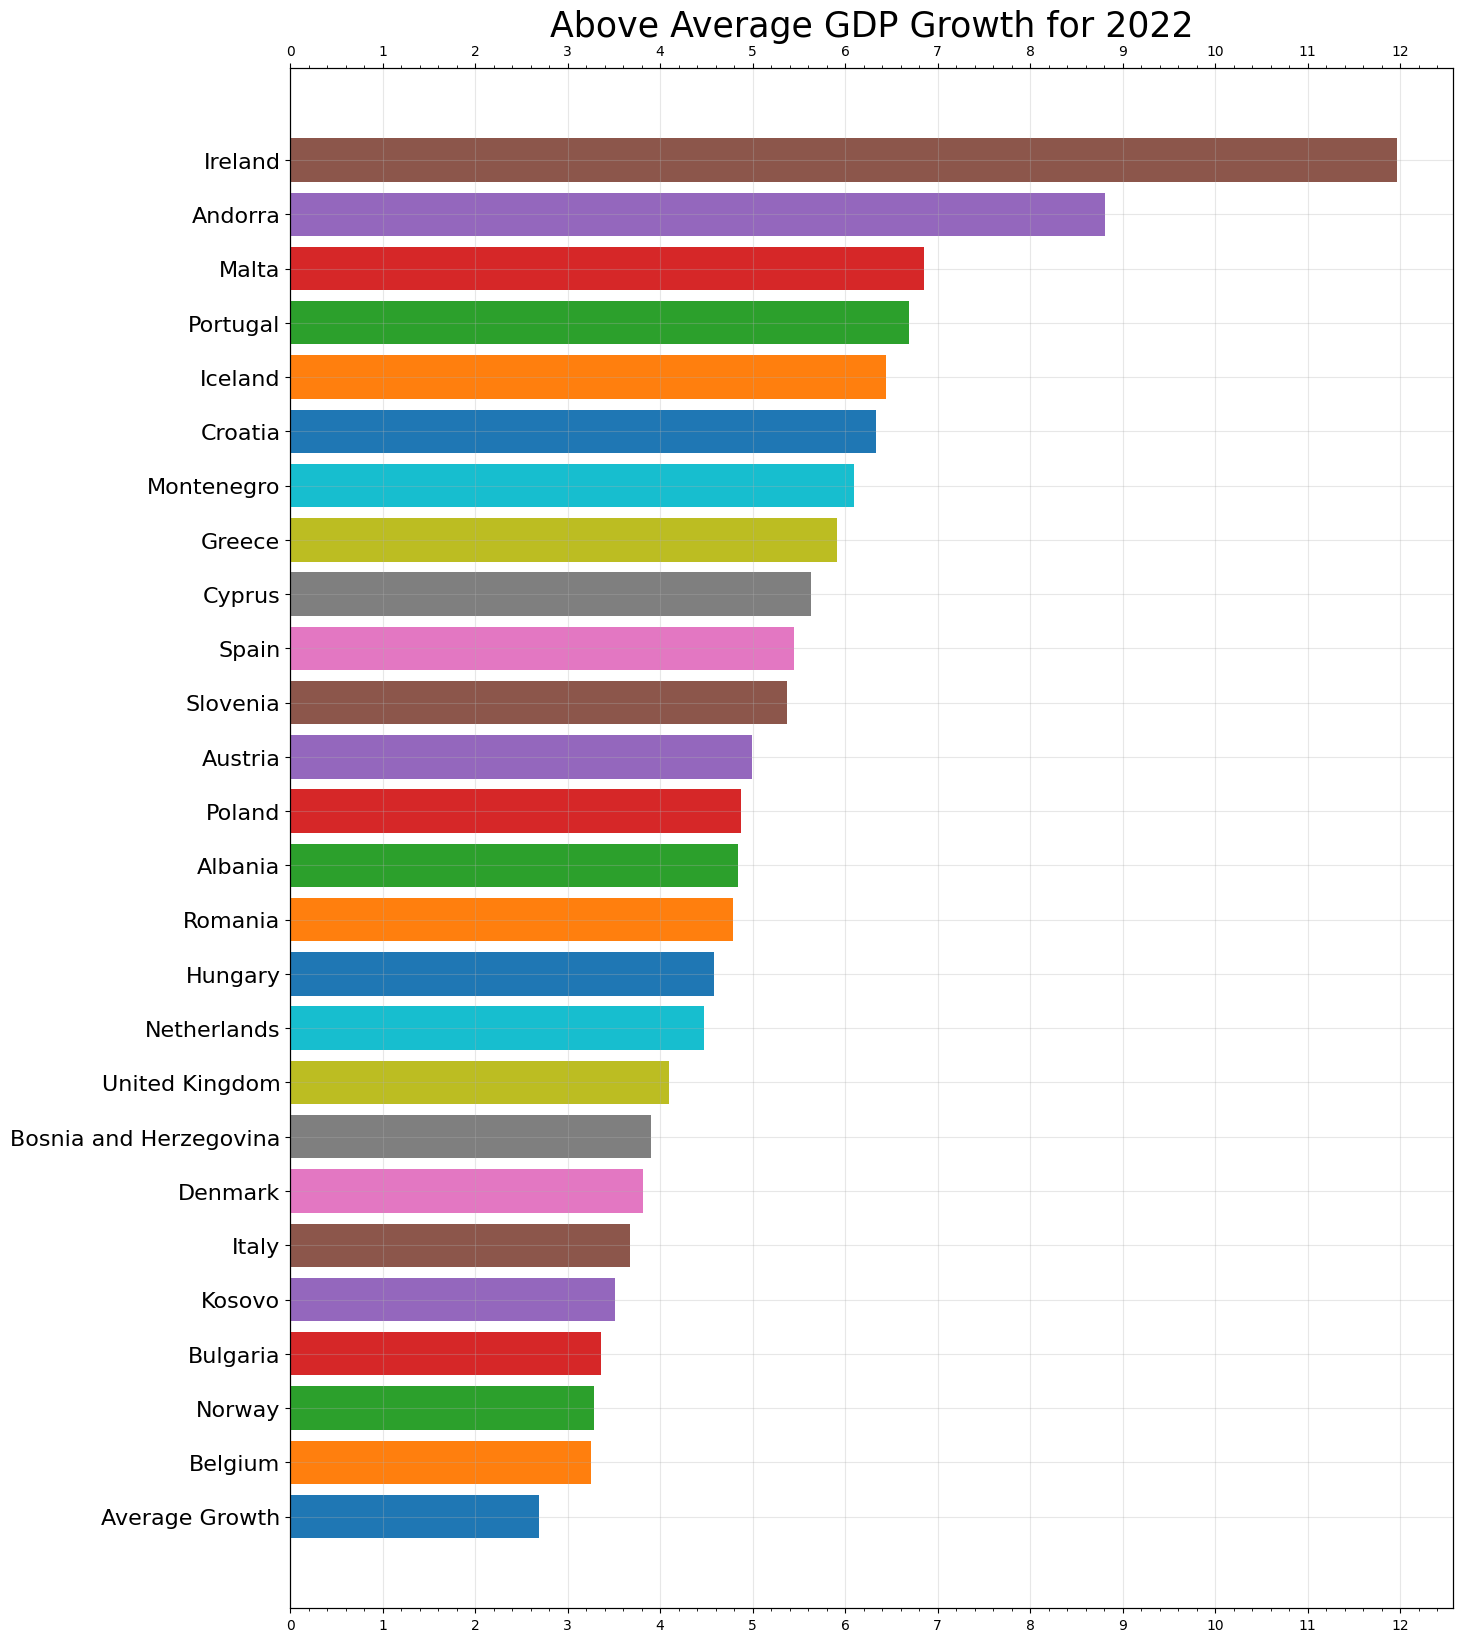

In [394]:
from matplotlib.ticker import MultipleLocator


average_2022_growth = average_gdp_growth[average_gdp_growth['Year'] == 2022]['GDP growth (annual %)_x'].values[0]


largest = above_average_2022_gdp_growth['GDP growth (annual %)_x'].max()
MAJOR_LOCATOR = largest // 10
MINOR_LOCATOR = MAJOR_LOCATOR / 5

fig, ax = plt.subplots(figsize=(15, 20))

ax.set_title('Above Average GDP Growth for 2022', fontsize=25)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_locator(MultipleLocator(MAJOR_LOCATOR))
ax.xaxis.set_minor_locator(MultipleLocator(MINOR_LOCATOR))

ax.barh('Average Growth', average_2022_growth)
for index in above_average_2022_gdp_growth.index:
    value = above_average_2022_gdp_growth.at[index, 'GDP growth (annual %)_x']
    name = above_average_2022_gdp_growth.at[index, 'Country Name']
    ax.barh(name, value)

# Mirror the bottom x-axis to be shown at the top as well
ax_top = ax.twiny()
ax_top.xaxis.set_major_locator(MultipleLocator(MAJOR_LOCATOR))
ax_top.xaxis.set_minor_locator(MultipleLocator(MINOR_LOCATOR))
ax_top.set_xlim(ax.get_xlim())

for tick_label in ax.get_yticklabels():
    tick_label.set_fontsize(16)


# 3.1 Finding all countries with bellow average 2022 GDP growth rates
**Finding all the countries that have bellow average GDP Growth Rates and ordering the results in descending order**
**Steps:**
* Use the already created variable with the data of 2022 only
* Filter the data, comparing it to the average of the 2022 GDP growth rate
* Order the results in descending order

In [395]:
year_2022_economic_data = (
    europe_economic_data[europe_economic_data['Year'] == 2022]
)

bellow_average_2022_gdp_growth = (
    year_2022_economic_data
    [year_2022_economic_data['GDP growth (annual %)_x'] < year_2022_economic_data['GDP growth (annual %)_x'].mean()]
)

bellow_average_2022_gdp_growth = (
    bellow_average_2022_gdp_growth[bellow_average_2022_gdp_growth['GDP growth (annual %)_x'] > 0]
)

bellow_average_2022_gdp_growth = bellow_average_2022_gdp_growth.sort_values('GDP growth (annual %)_x', ascending=True)

# 3.1.0 Visualize the found data with a bar chart

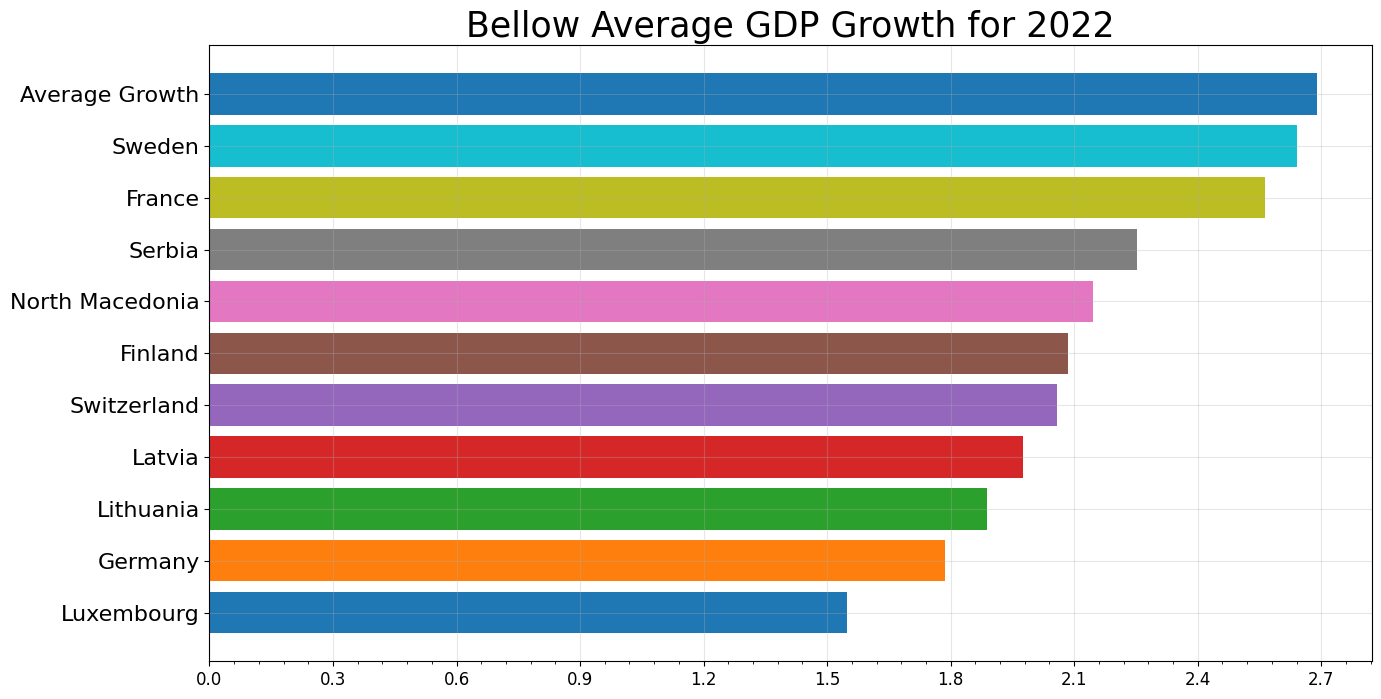

In [396]:
from math import ceil

fig, ax = plt.subplots(figsize=(15, 8))

largest = ceil(bellow_average_2022_gdp_growth['GDP growth (annual %)_x'].max())
MAJOR_LOCATOR = largest / 10
MINOR_LOCATOR = MAJOR_LOCATOR / 5

ax.set_title('Bellow Average GDP Growth for 2022', fontsize=25)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_locator(MultipleLocator(MAJOR_LOCATOR))
ax.xaxis.set_minor_locator(MultipleLocator(MINOR_LOCATOR))

for index in bellow_average_2022_gdp_growth.index:
    value = bellow_average_2022_gdp_growth.at[index, 'GDP growth (annual %)_x']
    name = bellow_average_2022_gdp_growth.at[index, 'Country Name']
    ax.barh(name, value)

ax.barh('Average Growth', average_2022_growth)

for tick_label in ax.get_yticklabels():
    tick_label.set_fontsize(16)

for tick_label in ax.get_xticklabels():
    tick_label.set_fontsize(12)



# 3.1 Finding all countries with negative 2022 GDP growth rates
**Finding all the countries that have negative GDP Growth Rates and ordering the results in descending order**
**Steps:**
* Use the already created variable with the data of 2022 only
* Filter the data, keeping only the negative growth countries
* Order the results in descending order
* Visualize the results

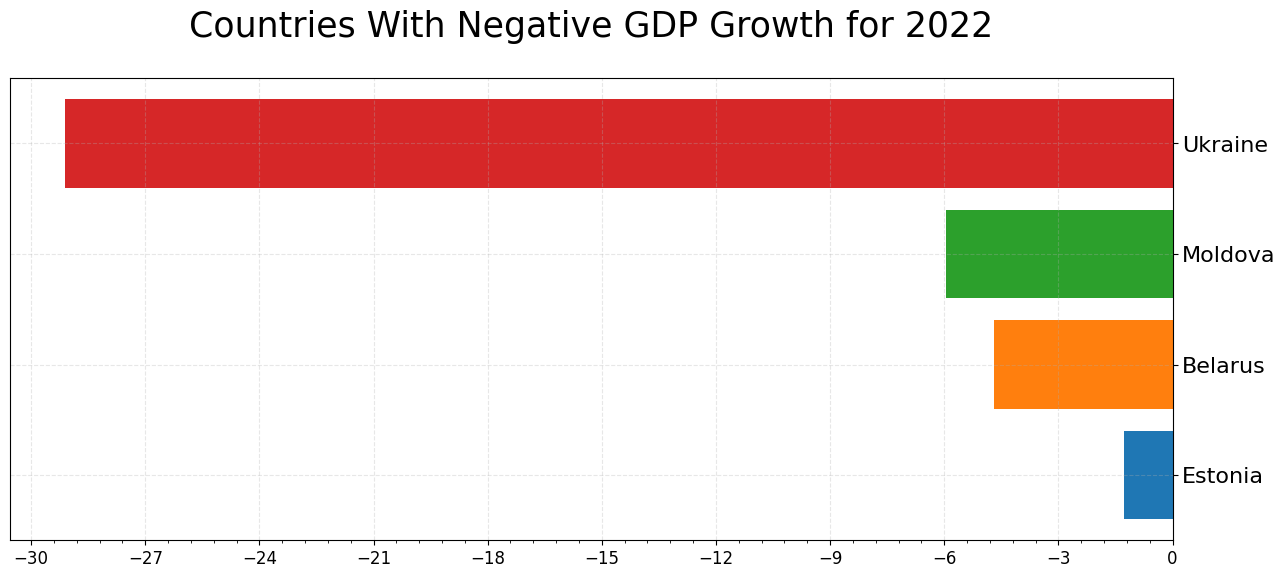

In [437]:
negative_2022_growth = year_2022_economic_data[year_2022_economic_data['GDP growth (annual %)_x'] < 0]
negative_2022_growth = negative_2022_growth.sort_values('GDP growth (annual %)_x', ascending=False)

fig, ax = plt.subplots(figsize=(15, 6))

MAJOR_LOCATOR = ceil(abs(negative_2022_growth['GDP growth (annual %)_x'].min()) / 10)
MINOR_LOCATOR = MAJOR_LOCATOR / 5

ax.xaxis.set_minor_locator(MultipleLocator(MINOR_LOCATOR))
ax.xaxis.set_major_locator(MultipleLocator(MAJOR_LOCATOR))

ax.yaxis.tick_right()

ax.set_title('Countries With Negative GDP Growth for 2022', fontsize=25, pad=30)
ax.grid(True, alpha=0.3, ls='dashed')

for index in negative_2022_growth.index:
    name = negative_2022_growth.at[index, 'Country Name']
    value = negative_2022_growth.at[index, 'GDP growth (annual %)_x']
    ax.barh(name, value)

for tick_label in ax.get_yticklabels():
    tick_label.set_fontsize(16)
    
for tick_label in ax.get_xticklabels():
    tick_label.set_fontsize(12)


# 4.0 Proportional Distribution of Countries Bellow, Above and With Negative GDP Growth in 2022
**Steps:**
* Count the countries that are above average
* Count the countries that are bellow average
* Count the countries that are with a negative growth rate
* Visualise the data with a Pie chart


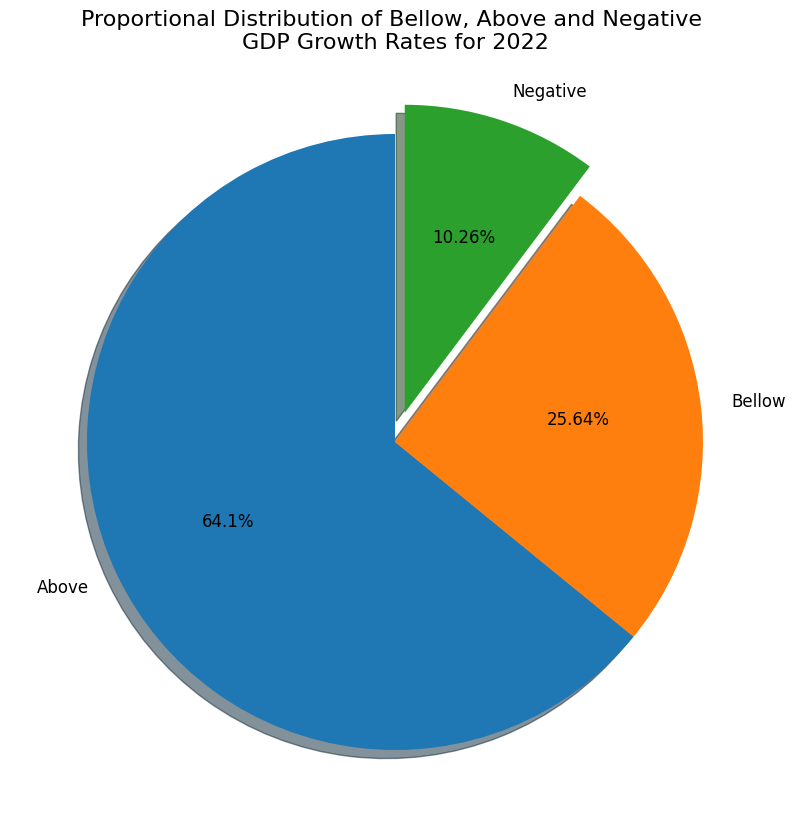

In [520]:
above = above_average_2022_gdp_growth['Year'].count()
bellow = bellow_average_2022_gdp_growth['Year'].count()
negative = negative_2022_growth['Year'].count()

results = np.array((above, bellow, negative))
labels = np.array(('Above', 'Bellow', 'Negative'))

explode_val = (0, 0, 0.1)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Proportional Distribution of Bellow, Above and Negative \nGDP Growth Rates for 2022', fontsize=16)
ax.pie(
    results, 
    labels=labels, 
    explode=explode_val, 
    startangle=90, 
    shadow=True, 
    autopct=lambda x: f"{round(x, 2)}%",
    textprops=dict(fontsize=12)
)


plt.show()
